# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### **Problem Statement:**
Within the dataset encompassing approximately 426K cars, our objective is to determine the influential factors that impact the pricing of used cars for a dealership. To achieve this, a comprehensive analysis of the dataset is imperative. This analysis includes:

**Data Cleaning:** A meticulous review of the dataset to identify and rectify any inconsistencies or inaccuracies.

**Outlier Detection:** Identifying potential outliers and evaluating whether they should be excluded from the analysis.

**Bias Assessment:** Scrutinizing the dataset for any biases and implementing appropriate measures to address them.

**Text Data Transformation:** Converting textual data into a format understandable by the predictive model.

Once these preprocessing steps are accomplished, the subsequent task involves predicting the prices of vehicles within the test dataset, a subset of the provided data. This will be achieved by training various models and subsequently summarizing the impact of distinct car features on used car pricing. The outcome will also encompass identifying the most suitable model for predicting the value of a car, based on the provided feature values.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# importing require library for data understanding
import pandas as pd

In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
df.shape

(426880, 18)

In [8]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
# importing required libraries
import numpy as np

In [10]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Droping columns which are not adding value to the model

In [11]:
df.drop(['id', 'VIN'], axis=1, inplace=True)

Checking % of nulls on each columns to handle them accordingly

In [12]:
(df.isna().sum()/df.shape[0]*100).sort_values()

region           0.000000
price            0.000000
state            0.000000
year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
paint_color     30.501078
drive           30.586347
condition       40.785232
cylinders       41.622470
size            71.767476
dtype: float64

Dropping null values from the columns which have lower % of impact on the datasize

In [13]:
df = df.dropna(subset=['year', 'odometer'])

Filling up rmaining null values with 'unknown' text so that we can use that data

In [14]:
df.fillna('unknown', inplace=True)

Checking for duplicates as now we dont have id column, and then dropping the duplicate data

In [15]:
df.duplicated().sum()

55253

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(366091, 16)

In [18]:
object_columns_df = df.select_dtypes(include=['object'])
object_columns_df.columns

cols_refused_on_hot_encoding = []
for column in object_columns_df.columns:
    values = df[column].value_counts()
    print(column, ': ' ,len(values))

region :  404
manufacturer :  43
model :  29219
condition :  7
cylinders :  9
fuel :  6
title_status :  7
transmission :  4
drive :  4
size :  5
type :  14
paint_color :  13
state :  51


As we have high number of unique values for few categorical features, we cannot transform them by using onehot encoder, so lets limit the values depensing on the high to low counts for each value and then mark remianing values to others

In [19]:
manufacturer_values = df['manufacturer'].value_counts()
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'others')

In [20]:
region_values = df['region'].value_counts()
df['region'] = df['region'].apply(lambda x: x if str(x) in region_values[:50] else 'others')

In [21]:
df['model'].sample(20)

382042                   f-150 fx4
385910                       pilot
38253     a6 2.0t premium sedan 4d
212285                     equinox
147069                       f-150
247560                      bronco
289233                         lr3
195184               cruze limited
45306             silverado 3500hd
353533                      altima
351682                        f150
194482                   vibe base
181351              golf r 4motion
50038                     veloster
330979    s60 t6 r-design sedan 4d
137965              silverado 1500
149915        genesis 3.8 sedan 4d
291315                     hhr lt1
154072                    corvette
258603                      sonata
Name: model, dtype: object

As model has random text value and there is no way to extract the actual model value lets drop this column

In [22]:
df.drop(['model'], axis=1, inplace=True)

In [23]:
df.describe()

,price,year,odometer
count,3.660910e+05,366091.000000,3.660910e+05
mean,8.500568e+04,2011.064989,9.732928e+04
std,1.315480e+07,9.812326,2.119252e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.999000e+03,2008.000000,3.588550e+04
50%,1.449500e+04,2013.000000,8.379100e+04
75%,2.699000e+04,2017.000000,1.334615e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [24]:
df['year'] = df['year'].astype(int)

In [25]:
sample_data = df.sample(2000)

Lets have a look at the data wrt outliers

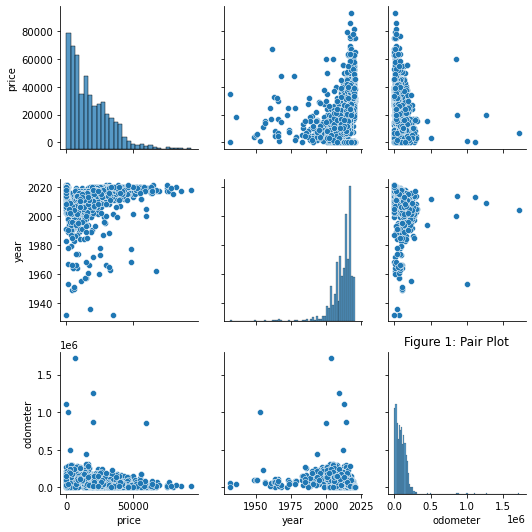

<Figure size 432x288 with 0 Axes>

In [26]:
sns.pairplot(sample_data)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.show()
plt.savefig('charts/Correlation-sample-plot.jpg')

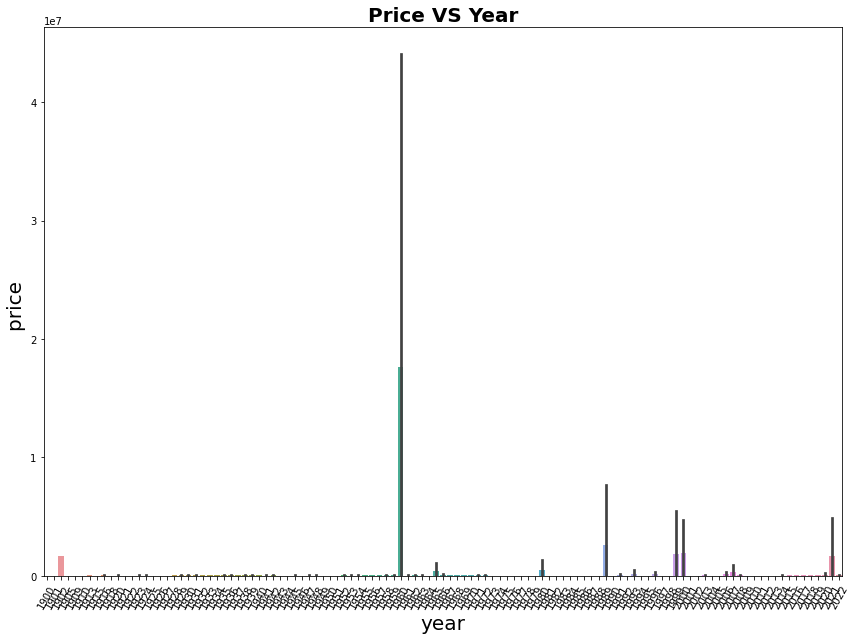

<Figure size 432x288 with 0 Axes>

In [27]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize =(12,9))
sns.barplot(y=df['price'],x=df['year'])
plt.title("Price VS Year",fontsize=20,fontweight ='bold')
plt.xlabel('year',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('price ',fontsize = 20)
plt.tight_layout()
plt.show()
plt.savefig('charts/Year-Vs-Price-bar-outlier_detection.jpg')

Looking at the above data there seems to be some outliers, so lets put a threshold on the data on 75% for upper bound and 25% for lower bound on numerical parameters for price and odometer

In [28]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_bound = price_percentile75 + 1.5 * price_iqr
price_lower_bound = df['price'].quantile(0.15)
df_bounded = df[(df['price'] < price_upper_bound) & (df['price'] > price_lower_bound)]

In [29]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_bound = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_bound = df['odometer'].quantile(0.05)
df_bounded = df_bounded[(df_bounded['odometer'] < odometer_upper_bound) & (df_bounded['odometer'] > odometer_lower_bound)]

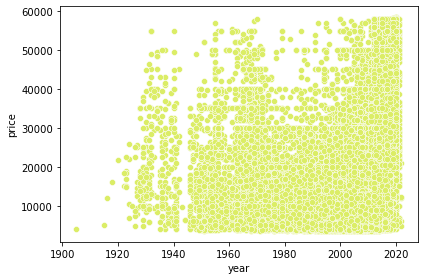

In [30]:
sns.scatterplot(x="year",
                    y="price",
                    data=df_bounded)
plt.savefig('charts/Year-Vs-Price_scatter-before-cap.jpg')

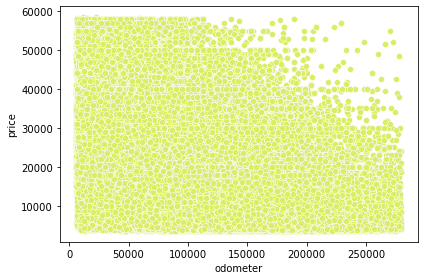

In [31]:
sns.scatterplot(x="odometer",
                    y="price",
                    data=df_bounded)
plt.savefig('charts/Odometer-Vs-Price_scatter.jpg')

Looking at above plot there seems to be some outlier for year so lets put lower bound on year

In [32]:
df_bounded.query('year > 1945', inplace=True)

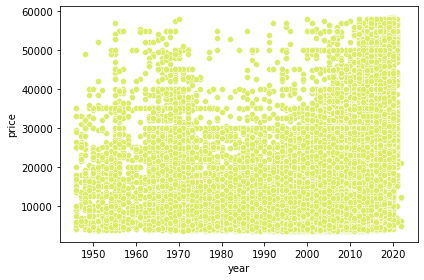

In [33]:
sns.scatterplot(x="year",
                    y="price",
                    data=df_bounded)
plt.savefig('charts/Year-Vs-Price_scatter.jpg')

/Users/lalityasawant/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


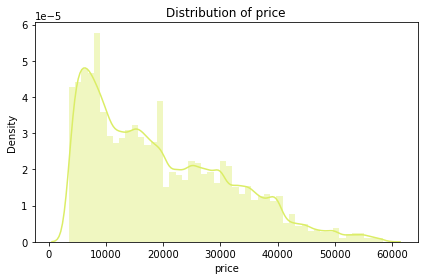

In [34]:
sns.distplot(df_bounded.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('Insight-Dist-Plot',dpi=None)
plt.show()

In [35]:
df_bounded.shape

(286705, 15)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV
import scipy as sp
from sklearn import set_config
set_config(display="diagram")


Creating pipline for one hot encoding of catgorical data

In [37]:
pipe_categorical = Pipeline(
    steps = [('one_hot_encoder', OneHotEncoder(sparse = False, drop = 'first'))]
)

Creating pipeline for standard Scaling numerical data

In [38]:
pipe_numerical = Pipeline(
    steps = [('standard_scaler', StandardScaler())]
)

In [39]:
object_columns_df = df_bounded.select_dtypes(include=['object'])
object_columns_df.columns

Index(['region', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

Creating transformer for transforming the data

In [40]:
df_bounded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286705 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        286705 non-null  object 
 1   price         286705 non-null  int64  
 2   year          286705 non-null  int64  
 3   manufacturer  286705 non-null  object 
 4   condition     286705 non-null  object 
 5   cylinders     286705 non-null  object 
 6   fuel          286705 non-null  object 
 7   odometer      286705 non-null  float64
 8   title_status  286705 non-null  object 
 9   transmission  286705 non-null  object 
 10  drive         286705 non-null  object 
 11  size          286705 non-null  object 
 12  type          286705 non-null  object 
 13  paint_color   286705 non-null  object 
 14  state         286705 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 35.0+ MB


In [41]:
column_transformer = ColumnTransformer(transformers = [
    ('categorical_pipe_trans', pipe_categorical['one_hot_encoder'], ['region', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state']),
    ('numerical_pipe_trans', pipe_numerical, ['odometer'])
])

In [42]:
X_train, X_test, y_train, y_test = train_test_split (df_bounded.drop(['price'], axis = 1), 
                                                     df_bounded['price'], 
                                                     random_state = 42, test_size = .3)

In [43]:
X_train_tnf = column_transformer.fit_transform(X_train)

In [44]:
X_test_tnf = column_transformer.transform(X_test)

In [45]:
print(pd.DataFrame(X_train_tnf).shape)
print(pd.DataFrame(X_test_tnf).shape)

(200693, 181)
(86012, 181)


### Linear Regression model

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
LR = Pipeline([
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(LinearRegression())),
                                    ('linreg', LinearRegression())])
LR.fit(X_train_tnf, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', SelectFromModel(estimator=LinearRegression())),
                ('linreg', LinearRegression())])

We have 181 fetures to run the model

In [47]:
y_pred = LR.predict(X_test_tnf)

### Ridge Regression model

In [48]:
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])


ridge_param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_pipe = Pipeline([('scaler', StandardScaler()),('ridge',Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train_tnf, y_train)
train_preds = ridge_grid.predict(X_train_tnf) 
test_preds = ridge_grid.predict(X_test_tnf)
ridge_train_mse = mean_squared_error(y_train, train_preds)
ridge_test_mse = mean_squared_error(y_test, test_preds)

In [49]:
ridge_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [50]:
ridge_grid

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0,
                                          1000.0]})

In [51]:
print('Training data mse: ', ridge_train_mse)
print('Testing data mse: ', ridge_test_mse)
best_model = ridge_grid.best_estimator_
print('Best Model: ', best_model)

Training data mse:  55822104.80367072
Testing data mse:  55730104.92192151
Best Model:  Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10.0))])


In [52]:
RR = Ridge(alpha=10, solver='auto')
RR.fit(X_train_tnf, y_train)
y_pred = RR.predict(X_test_tnf)

### LASSO Regression model

In [53]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_tnf, y_train)
y_pred = lasso.predict(X_test_tnf)

/Users/lalityasawant/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.465e+12, tolerance: 2.931e+09
  model = cd_fast.enet_coordinate_descent(


In [54]:
lasso

Lasso(alpha=0.0001)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [55]:
# importing required libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
def model_performance(y_test, y_pred):
    result=[]
    result.append('%.4f' % r2_score(y_test,y_pred))
    result.append('%.4f' % (r2_score(y_test,y_pred)*100))
    result.append('%.2f' % mean_squared_error(y_test, y_pred))
    result.append('%.2f' % mean_absolute_error(y_test, y_pred))
    result.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (result)

score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

#### Linear Model Evaluation

In [57]:
score_lr = model_performance(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.6179
Mean squared error:  55730138.44
Mean absolute error:  5656.36
Root mean squared error:  7465.26


#### Ridge Model Evaluation

In [58]:
score_rr = model_performance(y_test, y_pred)
score_data['Ridge Regression'] = score_rr
print('R2 score: ', score_rr[0])
print('Mean squared error: ', score_rr[2])
print('Mean absolute error: ', score_rr[3])
print('Root mean squared error: ', score_rr[4])

R2 score:  0.6179
Mean squared error:  55730138.44
Mean absolute error:  5656.36
Root mean squared error:  7465.26


#### LASSO Model Evaluation

In [59]:
score_lasso = model_performance(y_test, y_pred)
score_data['Lasso Regression'] = score_lasso
print('R2 score: ', score_lasso[0])
print('Mean squared error: ', score_lasso[2])
print('Mean absolute error: ', score_lasso[3])
print('Root mean squared error: ', score_lasso[4])

R2 score:  0.6179
Mean squared error:  55730138.44
Mean absolute error:  5656.36
Root mean squared error:  7465.26


### Comparing Models

In [60]:
score_data

,Linear Regression,Ridge Regression,Lasso Regression
R2 Score,0.6179,0.6179,0.6179
Accuracy(%),61.7940,61.7940,61.7940
Mean Squared Error,55730138.44,55730138.44,55730138.44
Mean Absolute Error,5656.36,5656.36,5656.36
Root MSE,7465.26,7465.26,7465.26


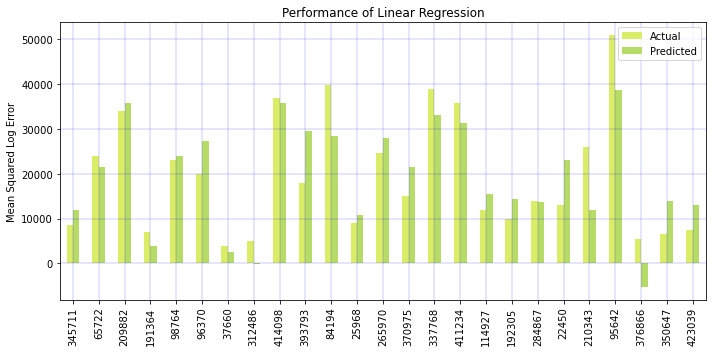

In [61]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(25)
bar = df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='blue')
plt.title('Performance of Linear Regression')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Linear-Regression-Performance.jpg')
plt.show()

### Trying onemore model for finding the coefficiants

Re visullizing the data

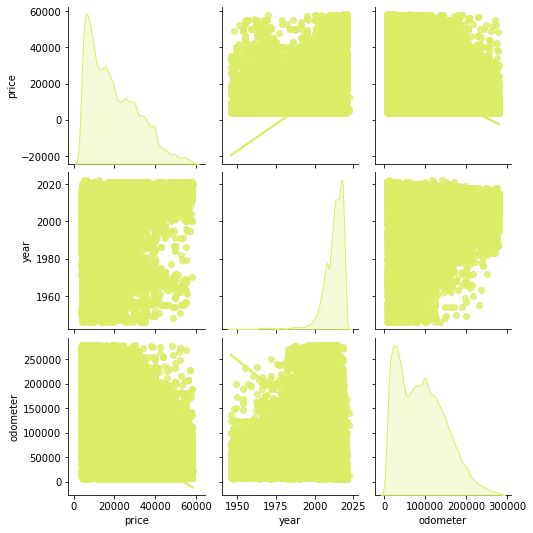

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_bounded.drop(['price'], axis = 1), df_bounded['price'], random_state=42)

train_dataset = X_train.copy()
train_dataset.insert(0, "price", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")
plt.savefig('charts/Data-Re-visulization.jpg')

Looking at the above data we can see that the price odometer and year are strongly corellated

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215028 entries, 415045 to 181804
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        215028 non-null  object 
 1   year          215028 non-null  int64  
 2   manufacturer  215028 non-null  object 
 3   condition     215028 non-null  object 
 4   cylinders     215028 non-null  object 
 5   fuel          215028 non-null  object 
 6   odometer      215028 non-null  float64
 7   title_status  215028 non-null  object 
 8   transmission  215028 non-null  object 
 9   drive         215028 non-null  object 
 10  size          215028 non-null  object 
 11  type          215028 non-null  object 
 12  paint_color   215028 non-null  object 
 13  state         215028 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 32.7+ MB


Looking at above info,  the dataset contains columns with different data types and we need to apply a specific preprocessing for each data types. 
pre-processor Steps:

1. one-hot encode (i.e., generate a column by category) the categorical columns, only for non-binary categorical variables
2. Standard scaler for Numerical data


## Linear models with regularization

In [64]:

categorical_columns =  ['region', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state']
numerical_columns = ["year", "odometer"]


preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas)
    ),
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['region', 'manufacturer',
                                                   'condition', 'cylinders',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

Checking if we have an alpha value

In [65]:
model[-1].regressor_.alpha_

10.0

Checking Coefficients

In [66]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
onehotencoder__fuel_diesel,8932.534830
onehotencoder__cylinders_12 cylinders,7678.495723
onehotencoder__cylinders_10 cylinders,4501.740883
onehotencoder__title_status_missing,3468.408959
onehotencoder__manufacturer_lexus,3458.993054
...,...
onehotencoder__title_status_salvage,-3802.081623
onehotencoder__manufacturer_kia,-3951.549654
onehotencoder__type_hatchback,-3958.245991
standardscaler__odometer,-6020.307555


Plotting top 20 coefficients

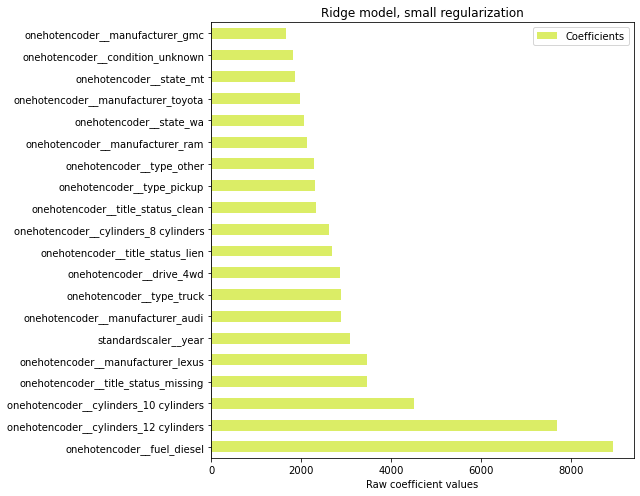

In [67]:
coefs_20 = coefs.sort_values(by=['Coefficients'], ascending=False).head(20)

coefs_20.sort_values(by=['Coefficients'], ascending=False).plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)
plt.savefig('charts/Features-affecting-used-car-price.jpg')

### Conclusion

The used car dataset initially encompassed approximately 426,000 car records. However, upon a meticulous examination of the dataset, we identified instances of duplicate records and encountered numerous instances of missing information spread across various columns. Through a thorough process of data cleansing, which entailed either imputing or discarding the incomplete records, we successfully refined the dataset to encompass 286,705 records, while also making the decision to eliminate certain columns.

  Furthermore, we navigated the intricacies of categorical columns by employing an encoder to transform this data into a format compatible with our prediction models. We subjected the dataset to three distinct models, including Linear Regression, Ridge Regression, and Lasso. Remarkably, these models consistently generated predictions that exhibited minimal discrepancies, as evidenced by their closely aligned loss function values.

  Based on our comprehensive analysis, we identified several pivotal features that hold significance for dealerships when making car sales decisions:

  * Fuel type of the car
  * Number of cylinders in the engine
  * Quality of the car's title status
  * Manufacturer of the car
  * Manufacturing year of the car
  * Type of the car
  * Drive configuration of the car (4wd or 2wd)
  * The specific state where the car is sold

  These insights serve as valuable guidelines for dealerships, empowering them to make informed decisions during the process of selling cars.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Link to Report: https://github.com/LalityaSawant/Berkley-ML-AI-Assignments-2/blob/master/README.md